In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
from math import e
from sympy import *
x, y, z = symbols('x y z')
a, b, r= symbols('a b r')
theta = symbols('theta')
init_printing(use_unicode=True)
from scipy.optimize import fsolve

In [2]:
# Fy(x,y)
diff((3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2, y)

In [3]:
#fx(x,y)
diff((3/4)*(y**2) + (1/24)*(y**3) -(1/32)*(y**4) - (x**2), x)

<IPython.core.display.Javascript object>


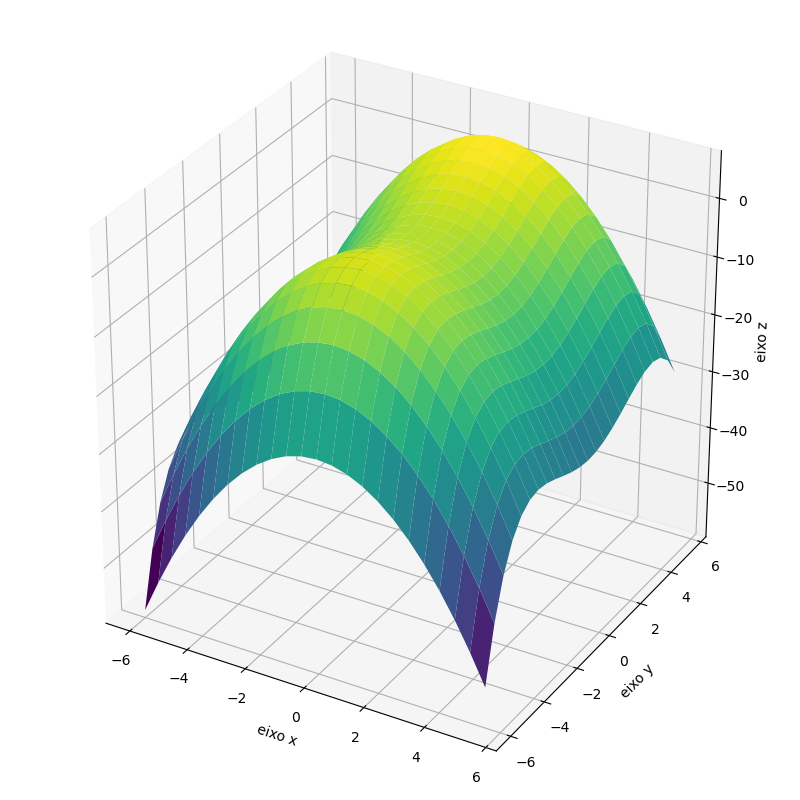

In [4]:
# gráficos de z = f(x,y)
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)

fig1 = plt.figure(figsize=(8,8))          # cria o objeto figura
ax1 = Axes3D(fig1)                         # cria eixos 3d para a figura
ax1.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.viridis)  # estabelece ordem dos eixos
ax1.set_xlabel('eixo x')
ax1.set_ylabel('eixo y')
ax1.set_zlabel('eixo z')
plt.show()

<IPython.core.display.Javascript object>


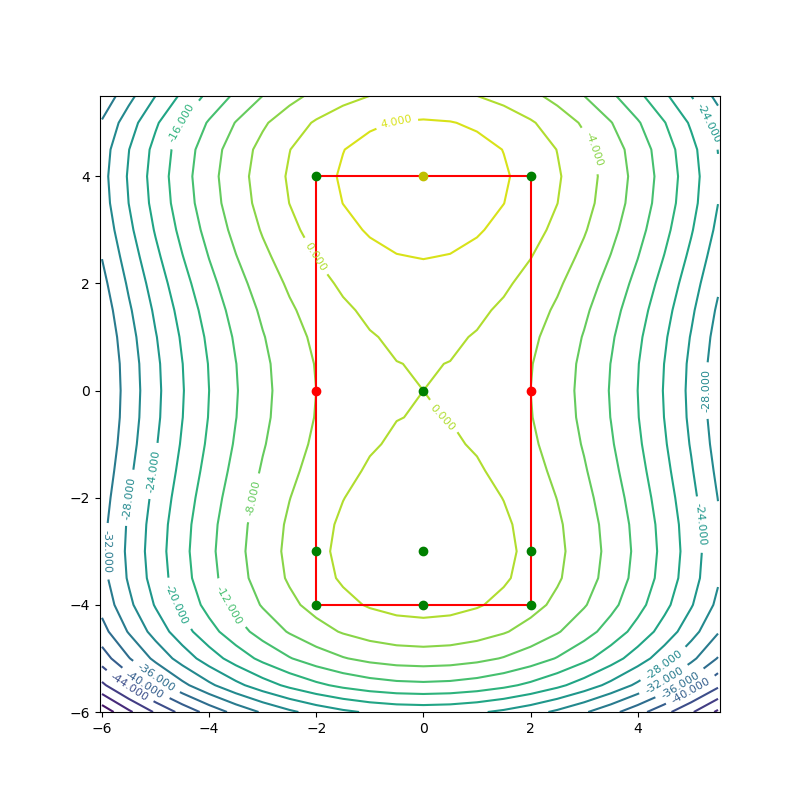

In [5]:
# gráfico das Curvas de Nível
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)
fx = -2*x                           # x=0
fy = -0.125*y**3 +0.125*y**2 +1.5*y # fy = y(-0.125y² +0.125y +1.5)
                                    #raizes de y = (-3, 0 , 4)
# pontos Críticos f(x,y)= (0,-3) (0,0) (0,4)

fig, ax = plt.subplots(figsize=(8,8))

# Achar os valores máximo e mínimo absoluto de f(x,y)
# no retângulo R : x = [-2, 2], y = [-4, 4]
# Preto ponto Crítico de f(x,y)
# Amarelo ponto de Máximo do retângulo R (0,4)
# Vermelho ponto de Mínimo do retângulo R (-2,0) e (2,0)
tx = np.linspace(-2, 2, 100)
ty = np.linspace(-4, 4, 100)
R1 = [-2]*len(ty)
R2 = [2]*len(ty)
R3 = [-4]*len(tx)
R4 = [4]*len(tx)
plt.plot(R1,ty, 'r')
plt.plot(R2,ty, 'r')
plt.plot(tx, R3, 'r')
plt.plot(tx, R4, 'r')
plt.axis('equal')
plt.plot([0],[0], "go") # P1
plt.plot([2],[4], "go") # P2
plt.plot([2],[0], "ro") # P3 - Ponto de mínimo local
plt.plot([2],[-4], "go") # P4
plt.plot([0],[-4], "go") # P5
plt.plot([-2],[-4], "go") # P6
plt.plot([-2],[0], "ro") # P7 - ponto de mínimo local
plt.plot([-2],[4], "go") # P8
plt.plot([0],[4], "yo") # P9 - ponto de máximo 
plt.plot([-2],[-3], "go") # P10
plt.plot([2],[-3], "go") # P11
plt.plot([0],[-3], "go") # P12

# gráfico das curvas de nível
CS = plt.contour(x,y,z,20) 
plt.clabel(CS, inline=1, fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


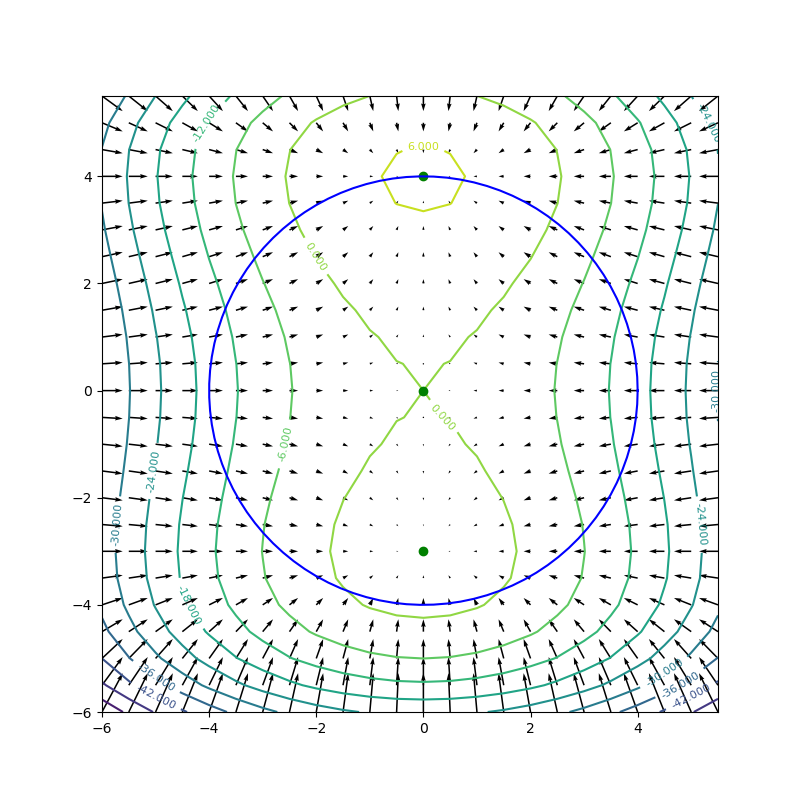

In [6]:
#g(x,y) = x0=0 e y0=0 - g(x,y)= x² +y² -4²
eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)
fx = -2*x                           # x=0
fy = -0.125*y**3 +0.125*y**2 +1.5*y # fy = y(-0.125y² +0.125y +1.5)
                                    #raizes de y = (-3, 0 , 4)
                                    # pontos Críticos f(x,y)= (0,-3) (0,0) (0,4)
fig, ax = plt.subplots(figsize=(8,8))

# gráfico dos vetores gradiente

ax.quiver(x,y,fx,fy)  # gradiente de f(x,y) = [fx, fy]
ax.set_aspect('equal')

plt.plot([0],[0], "go") #Ponto Crítico
plt.plot([0],[4], "go") #Ponto Crítico
plt.plot([0],[-3], "go") #Ponto Crítico

# funçao circular de g(x,y) com centro em (0,0) e raio 4
# x² + y² = raio² -> x²+y²=4² -> r - (c/k)²
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
a = raio*np.cos(t)
b = raio*np.sin(t) 
ax.plot(a, b, 'blue')

# gráfico das curvas de nível
CS = plt.contour(x,y,z,10) 
plt.clabel(CS, inline=1, fontsize=8)
plt.show()

In [7]:
# dado F(x,y) limitada por g(x,y) = (x²+y²=4²)
#∇f = (fx,fy)
#∇g = (2x,2y)
#∇f(x, y) = λ∇g(x, y)
# -2x=λ2x -> λ=-1
# -0.125*y**3 +0.125*y**2 +1.5*y = λ4y -> λ = -0.0313*y**2 +0.0313*y +0.375
def sistema (variaveis):  # definição do sistema
    (x, y, L) = variaveis
    eq1 = -2*x - L*2*x
    eq2 = -0.125*y**3 +0.125*y**2 +1.5*y - L*2*y
    eq3 = x**2 +y**2 - 16
    return [eq1, eq2, eq3]

s0 = np.array([0,4,0])  # solução inicial 1 - ponto de máximo em R
s = fsolve(sistema, s0)
print("P13 = ", s)

s0 = np.array([-2,0,0])  # solução inicial 2 - ponto de mínimo em R
s = fsolve(sistema, s0)
print("P14 = ", s)



P13 =  [0. 4. 0.]
P14 =  [-4.  0. -1.]


<IPython.core.display.Javascript object>


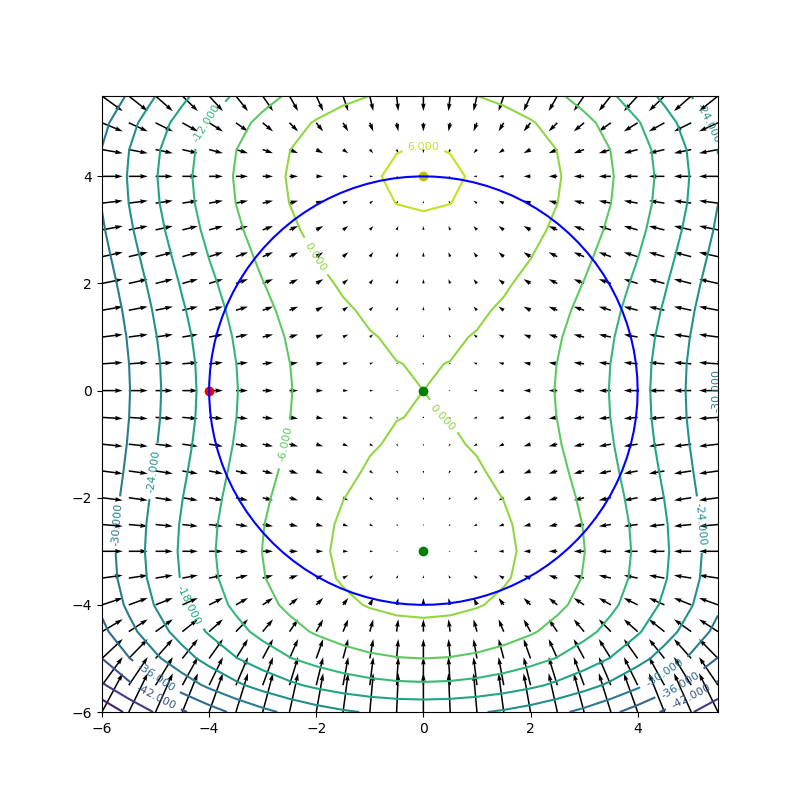

In [8]:
# gráfico das Curvas de Nível limitado por G, com destaque dos pontos críticos e dos pontos de máximo e mínimo

eixox = np.arange(-6, 6, 0.5)  # min, max, passo
eixoy = np.arange(-6, 6, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)
fx = -2*x                           # x=0
fy = -0.125*y**3 +0.125*y**2 +1.5*y # fy = y(-0.125y² +0.125y +1.5)
                                    #raizes de y = (-3, 0 , 4)
# pontos Críticos f(x,y)= (0,-3) (0,0) (0,4)


# gráfico do mapa dos vetores gradiente
fig, ax = plt.subplots(figsize=(8,8))
ax.quiver(x,y,fx,fy)  # gradiente de f(x,y) = [fx, fy]
ax.set_aspect('equal')


plt.plot([0],[0], "go") # ponto crítico
plt.plot([0],[4], "yo") # ponto de Máximo da Função/ponto crítico
plt.plot([0],[-3], "go") # ponto crítico
plt.plot([-4],[0], "ro") # ponto de Mínimo Limitado por G

# funçao circular de g(x,y)
# x² + y² = raio² -> x²+y²=2² -> r² - (c/k)²
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
a = raio*np.cos(t)
b = raio*np.sin(t) 
ax.plot(a, b, 'blue')

# gráfico das curvas de nível
CS = plt.contour(x,y,z,10) 
plt.clabel(CS, inline=1, fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


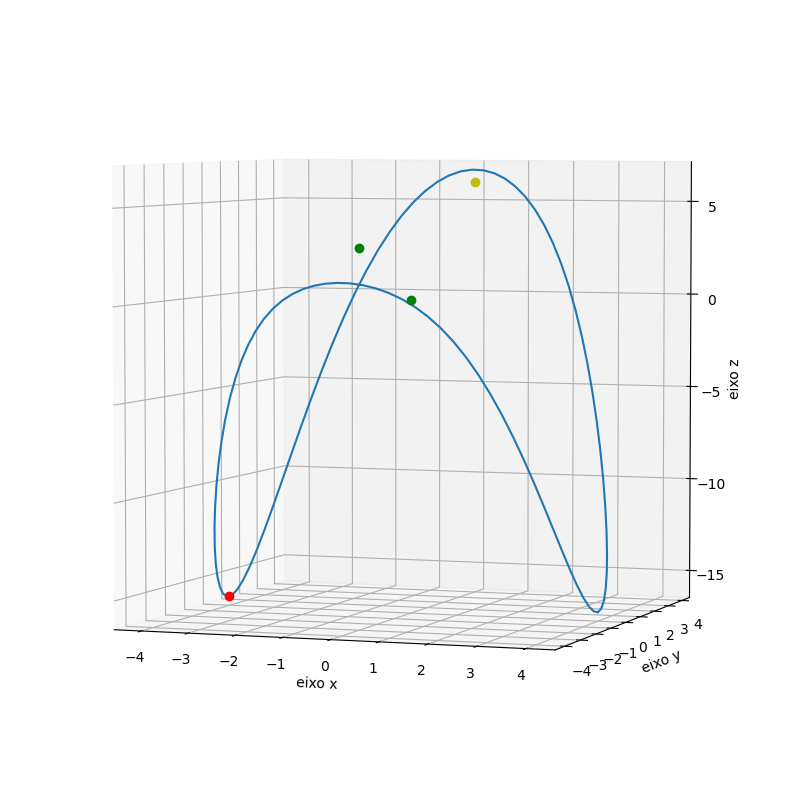

In [19]:
# gráfico de g(x,y,z) com os pontos críticos e de máximo e mínimo
eixox = np.arange(-7, 7, 0.5)  # min, max, passo
eixoy = np.arange(-7, 7, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)

fig1 = plt.figure(figsize=(8,8))          # cria o objeto figura
ax = Axes3D(fig1)                         # cria eixos 3d para a figura
                          

# funçao circular de g(x,y,z)
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
x = raio*np.cos(t)
y = raio*np.sin(t)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2
ax.plot(x, y, z) # estabelece ordem dos eixos
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')
ax.set_zlabel('eixo z') 

# Pontos Críticos de f(x,y) e Máximos e mínimos
ax.plot([0],[0],[0],"go") # ponto crítico
ax.plot([0],[4],[6.67], "yo") # ponto de Máximo da Função/ponto crítico
ax.plot([0],[-3],[3.09], "go") # ponto crítico
ax.plot([-4],[0],[-16], "ro") # ponto de Mínimo Limitado por G

plt.show()


<IPython.core.display.Javascript object>


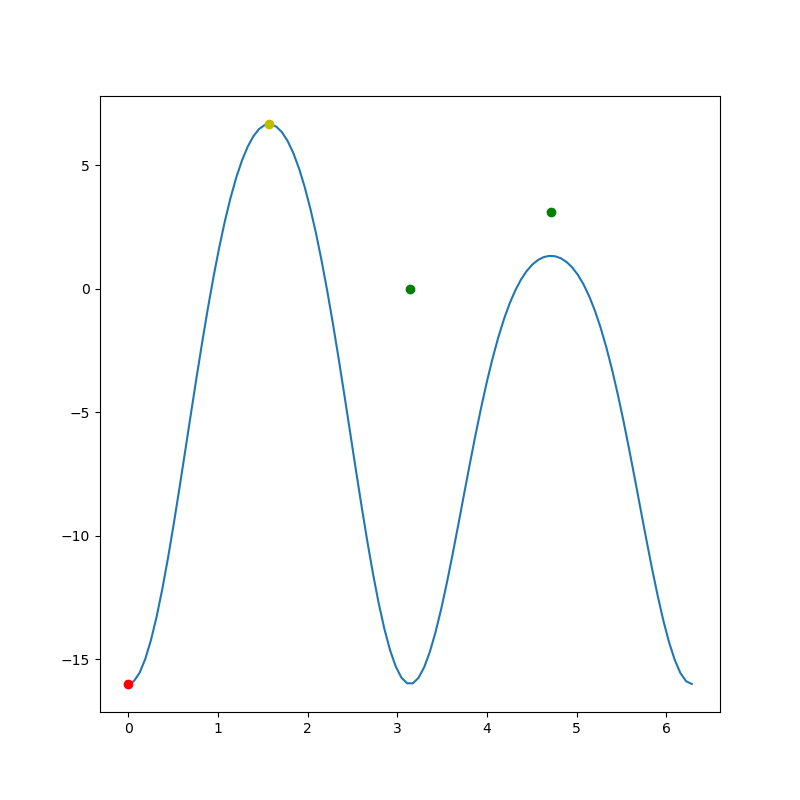

In [41]:
# gráfico de g(x,y,z) com os pontos críticos e de máximo e mínimo
eixox = np.arange(-7, 7, 0.5)  # min, max, passo
eixoy = np.arange(-7, 7, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)

fig1 = plt.figure(figsize=(8,8))          # cria o objeto figura

# funçao circular de g(x,y,z)
c = 0
r = 4
k = 1
t = np.linspace(0, 2*np.pi, 100)
raio = r - (c/k)**2
x = raio*np.cos(t)
y = raio*np.sin(t)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2
plt.plot(t,z) # estabelece ordem dos eixos

# Pontos Críticos de f(x,y) e Máximos e mínimos
plt.plot([np.pi],[0],"go") # ponto crítico
plt.plot([np.pi/2],[6.67], "yo") # ponto de Máximo da Função/ponto crítico
plt.plot([1.5*np.pi],[3.09], "go") # ponto crítico
plt.plot([0],[-16], "ro") # ponto de Mínimo Limitado por G


plt.show()


<IPython.core.display.Javascript object>


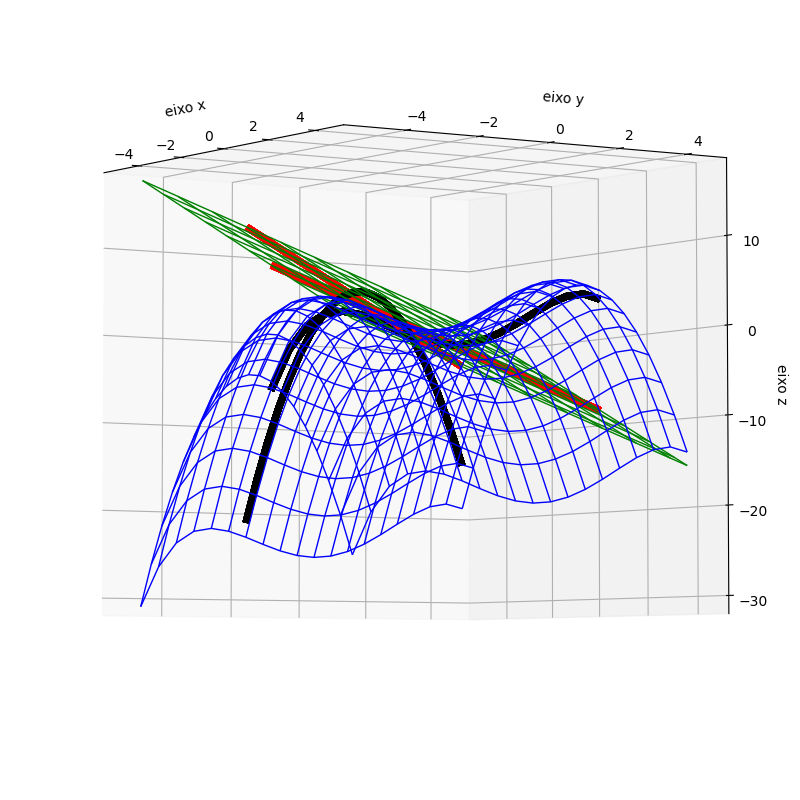

In [40]:
# funções do tipo z = f(x,y), visualização das curvas e retas tangentes
# z = f(x,y) = 3/4*y² + 1/24*y³− 1/32*y^4 − x2
# P=(1,-2)
# Determinar fx(1,-2) e fy(1,-2)  P = (1,-2) neste ponto z = 1.17
eixox = np.arange(-5, 5, 0.5)  # min, max, passo
eixoy = np.arange(-5, 5, 0.5)  # min, max, passo
x, y = np.meshgrid(eixox, eixoy)  # cria a grade (domínio)
z = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -x**2 #z = f(x,y)

# o plano y = 1 intercepta o parabolóide 
eixoz = np.arange(-10, 10, 0.1)
xplanoy, zplanoy = np.meshgrid(eixox,eixoz)
# resultando na curva na C1: z = 2 - x²
C1 =  23/6 -x**2
# T1 é a reta tangente à curva C1 em P
# a inclinação de T1 é fx(1,-2) = -2 e T1 passa por P = (1, -2, 1.17)
# 1.17 = -2(1)+b -> b=3.17
T1 = -2*x +3.17

# o plano x = 1 intercepta o parabolóide 
eixoz = np.arange(-10, 10, 0.1)
yplanox, zplanox = np.meshgrid(eixoy,eixoz)
# resultando na curva C2: z = 3 - 2y²
C2 = (3/4)*y**2 +(1/24)*y**3 -(1/32)*y**4 -2
# T2 é a reta tangente à curva C2 em P
# a inclinação de T2 é fy(1,-2) = -1.5 e T2 passa por P = (1, -2, 1.17)
# 1.17 = -1.5(-2) +c -> c=-1.83
T2 = -1.5*y -1.83

# Plano tangente ao parabolóide em P = (1, -2, 1.17)
# z-1.17=-2(x-1) -1.5(y+2)
# z=-2x -1.5y +0.17
plano = -2*x -1.5*y +0.17

fig = plt.figure(figsize=(8,8))          # cria o objeto figura
ax2 = Axes3D(fig)                         # cria eixos 3d para a figura
#ax2.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.viridis)
ax2.plot_wireframe(x, y, z, rstride=1, cstride=1, linewidth=1, color='b') 
ax2.plot_wireframe(x, -2, C1, rstride=1, cstride=1, linewidth=5, color='k') # C1
ax2.plot_wireframe(1, y, C2, rstride=1, cstride=1, linewidth=5, color='k')  # C2
ax2.plot_wireframe(x, -2, T1, rstride=1, cstride=1, linewidth=5, color='r') # T1
ax2.plot_wireframe(1, y, T2, rstride=1, cstride=1, linewidth=5, color='r')  # T2
ax2.plot_wireframe(x, y, plano, rstride=2, cstride=2, linewidth=1, color='g')  # plano

ax2.set_xlabel('eixo x')
ax2.set_ylabel('eixo y')
ax2.set_zlabel('eixo z')
plt.show()